In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

### Importanto os dados

In [17]:
data = pd.read_csv(os.path.join('Dados', 'porto_seguro', 'train.csv'))

In [18]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


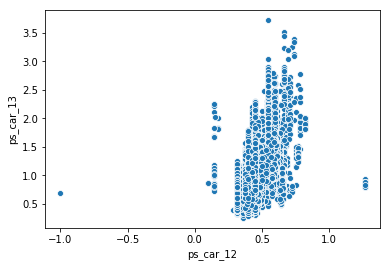

In [19]:
sns.scatterplot(x=data.ps_car_12, y=data.ps_car_13)

In [20]:
clustering_data = pd.DataFrame()
clustering_data['ps_car_12'] = data.ps_car_12
clustering_data['ps_car_13'] = data.ps_car_13

In [21]:
clustering_data.head()

,ps_car_12,ps_car_13
0,0.400000,0.883679
1,0.316228,0.618817
2,0.316228,0.641586
3,0.374166,0.542949
4,0.316070,0.565832


In [22]:
clustering_data.shape

(595212, 2)

In [23]:
clustering_data, _, _, _ = train_test_split(clustering_data, clustering_data, test_size=0.99, random_state=42) 

In [24]:
clustering_data.shape

(5952, 2)

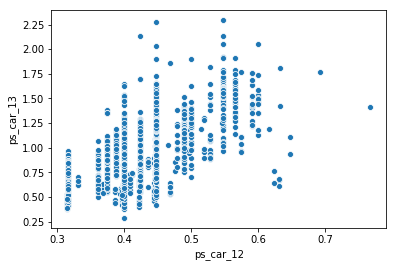

In [25]:
sns.scatterplot(x=clustering_data.ps_car_12, y=clustering_data.ps_car_13)

### K-Means

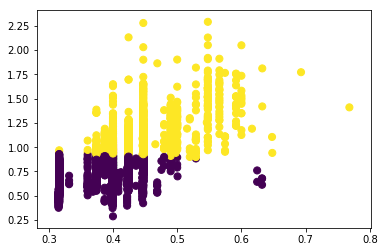

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(clustering_data)
y_kmeans = kmeans.predict(clustering_data)
plt.scatter(clustering_data.ps_car_12, clustering_data.ps_car_13, c=y_kmeans, s=50, cmap='viridis')

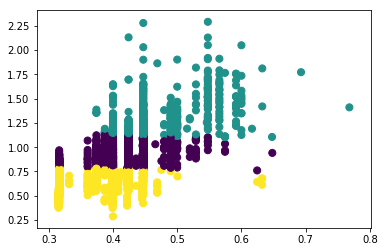

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_data)
y_kmeans = kmeans.predict(clustering_data)
plt.scatter(clustering_data.ps_car_12, clustering_data.ps_car_13, c=y_kmeans, s=50, cmap='viridis')

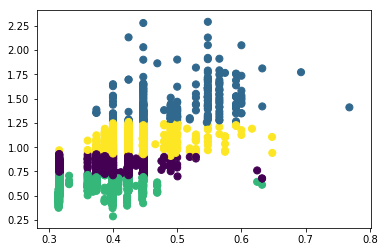

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(clustering_data)
y_kmeans = kmeans.predict(clustering_data)
plt.scatter(clustering_data.ps_car_12, clustering_data.ps_car_13, c=y_kmeans, s=50, cmap='viridis')

### Cluster hieráquico aglomerativo

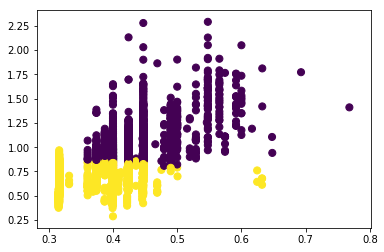

In [52]:
hclust = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=2, memory=os.path.join('Dados', 'cluster_data'))
hclust_labels = hclust.fit_predict(clustering_data)
plt.scatter(clustering_data.ps_car_12, clustering_data.ps_car_13, c=hclust_labels, s=50, cmap='viridis')

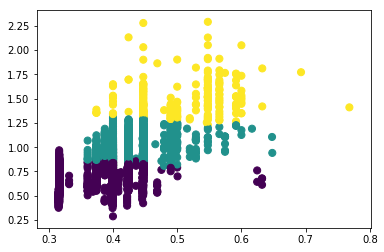

In [53]:
hclust = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3, memory=os.path.join('Dados', 'cluster_data'))
hclust_labels = hclust.fit_predict(clustering_data)
plt.scatter(clustering_data.ps_car_12, clustering_data.ps_car_13, c=hclust_labels, s=50, cmap='viridis')

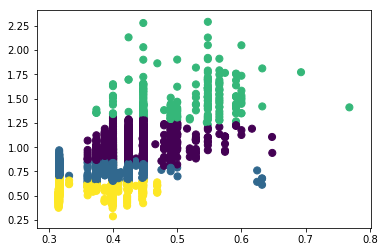

In [56]:
hclust = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=4, memory=os.path.join('Dados', 'cluster_data'))
hclust_labels = hclust.fit_predict(clustering_data)
plt.scatter(clustering_data.ps_car_12, clustering_data.ps_car_13, c=hclust_labels, s=50, cmap='viridis')